In [24]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

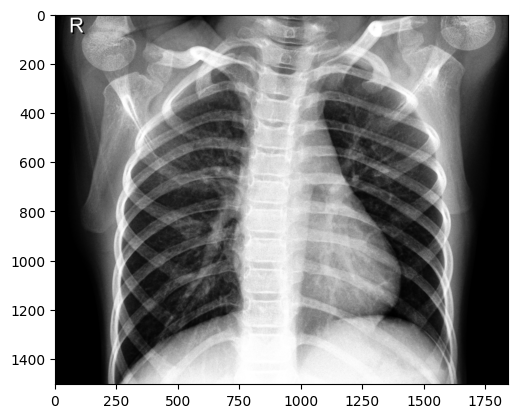

In [25]:
img = cv.imread('/content/0118.jpeg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

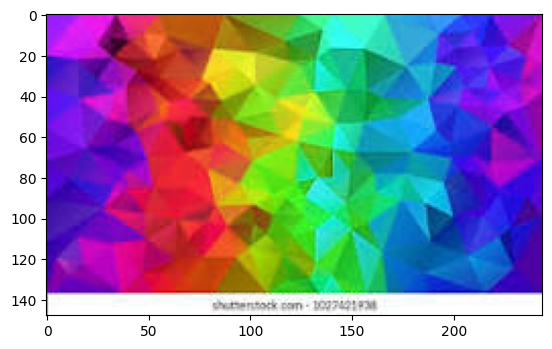

In [26]:
col_img = cv.imread('/content/download.jfif')
plt.imshow(col_img)

In [27]:
def display(og,new,title):
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  axes[0].imshow(og,cmap='gray')
  axes[0].set_title('ORIGINAL IMAGE')
  axes[0].axis('off')

  axes[1].imshow(new,cmap='gray')
  axes[1].set_title(title)
  axes[1].axis('off')

In [28]:
kernel = np.array([
    [-1/9, -1/9, -1/9],
    [-1/9,  8/9, -1/9],
    [-1/9, -1/9, -1/9]
])

# HIGH PASS FILTER

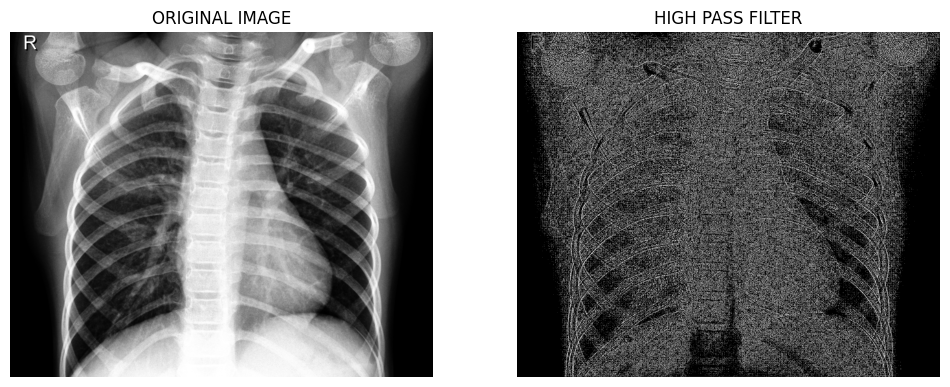

In [29]:
def high_pass_filter(image, kernel):
    # Get the dimensions of the image and the kernel
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate padding sizes
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image with zeros on all sides
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Create an output image of the same size as the input image
    output_image = np.zeros_like(image)

    # Perform convolution
    for i in range(img_height):
        for j in range(img_width):
            # Extract the region of interest
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            # Apply the kernel to the region
            output_image[i, j] = np.sum(region * kernel)

    return output_image

hpf = high_pass_filter(gray,kernel)
display(gray,hpf,'HIGH PASS FILTER')

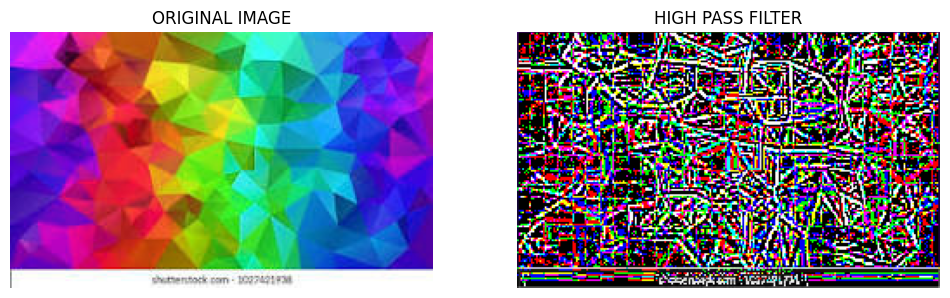

In [30]:
def high_pass_filter_coloured(image, kernel):
    # Unpack the shape of the image into height, width, and channels
    img_height, img_width, img_channels = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate padding needed on each side of the image
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    # Pad the image to handle border effects
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant', constant_values=0)

    # Prepare an empty output image with the same shape as the input
    output_image = np.zeros_like(image)

    # Iterate over each color channel
    for c in range(img_channels):
        # Apply the high-pass filter to each channel
        for i in range(img_height):
            for j in range(img_width):
                # Extract the region of interest from the padded image
                region = padded_image[i:i+kernel_height, j:j+kernel_width, c]
                # Apply the kernel to the region and store the result
                output_image[i, j, c] = np.sum(region * kernel)

    return output_image
hpf = high_pass_filter_coloured(col_img,kernel)
display(col_img,hpf,'HIGH PASS FILTER')

# HIGH BOOST FILTER

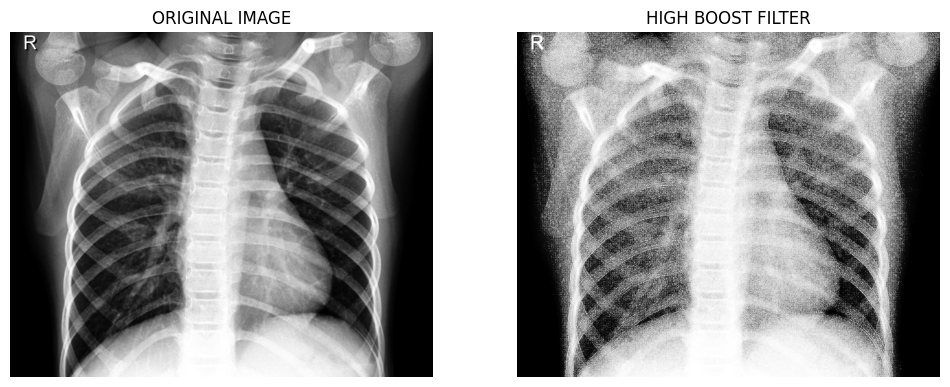

In [31]:
def high_boost_filter(image, kernel, A):
    # Apply the high-pass filter
    high_pass_filtered = high_pass_filter(image, kernel)

    # Compute the high-boost filtered image
    high_boost_filtered = image + A * high_pass_filtered

    # Clip values to be in the valid range (0-255 for uint8 images)
    high_boost_filtered = np.clip(high_boost_filtered, 0, 255)

    return high_boost_filtered

high_boost = high_boost_filter(gray,kernel,1.1)
display(gray,high_boost,'HIGH BOOST FILTER')

In [32]:
def high_boost_filter_coloured(image, kernel, alpha):
    # Apply the high-pass filter to the image
    high_pass_filtered = high_pass_filter_coloured(image, kernel)

    # Compute the high-boost filtered image
    high_boost_filtered = image + alpha * high_pass_filtered

    # Clip values to be within the valid range (0-255 for uint8 images)
    high_boost_filtered = np.clip(high_boost_filtered, 0, 255).astype(np.uint8)

    return high_boost_filtered

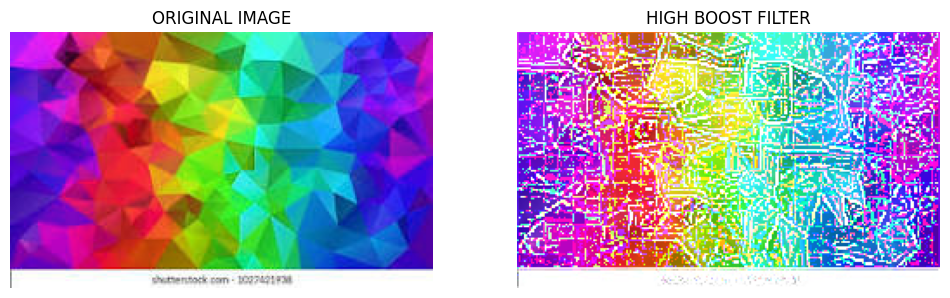

In [33]:
high_boost = high_boost_filter_coloured(col_img,kernel,1.1)
display(col_img,high_boost,'HIGH BOOST FILTER')